In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
import pandas as pd
import numpy as np
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_gnfuv_sample_results
from results_helper_functions import merge_gnfuv_results
std = ["original", "standardised"]
data = read_gnfuv_sample_results() 
merged_data = merge_gnfuv_results(data)

In [14]:
merged_data

[    model_r2  train_time  optimisation_time  discrepancy  model_r2-d  test_r2  \
 0       0.99        0.16               3.89         0.10        0.89     0.96   
 1       0.99        0.77              29.39         0.07        0.92     0.92   
 2       0.96        0.12               4.56         0.03        0.93     0.99   
 3       0.92        0.27              33.13         0.06        0.98     0.99   
 4       0.35        0.03               2.96         0.41       -0.07     0.51   
 5       0.24        0.06               5.28         0.48       -0.25     0.08   
 6       0.51        0.08               3.62         1.31       -0.79     0.35   
 7       0.08        0.10               4.52         0.12        0.17     0.24   
 8       0.57        0.08               2.93         0.80       -0.23     0.77   
 9       0.47        0.06               5.99         0.11        0.52     0.66   
 10      0.77        0.10               2.11         0.98       -0.21     0.57   
 11      0.66   

In [16]:
for i in range(2):
    print(std[i])
    for experiment in range(1,4):
        print(f"Experiment {experiment}", end=" ")
        for kernel in ["linear", "rbf"]:
            print(f"kernel={kernel}", end = " ")
            df = data[i].loc[(data[i].experiment == experiment) & (data[i].kernel == kernel)]
            unique_nodes = np.unique(df["model_node"])
            for node in unique_nodes:
                average_baseline_score = df["model_r2"].loc[df.model_node == node].mean()
                print(f"{node} ({round(average_baseline_score, 2)})", end = " ")
        print()
    print()

original
Experiment 1 kernel=linear pi2 (0.99) pi4 (0.92) kernel=rbf pi2 (0.99) pi4 (0.96) 
Experiment 2 kernel=linear pi2 (0.24) pi3 (0.47) pi4 (0.08) pi5 (0.66) kernel=rbf pi2 (0.35) pi3 (0.57) pi4 (0.51) pi5 (0.77) 
Experiment 3 kernel=linear pi2 (0.94) pi4 (0.99) kernel=rbf pi2 (0.94) pi4 (0.99) 

standardised
Experiment 1 kernel=linear pi2 (0.99) pi3 (0.94) pi4 (0.91) kernel=rbf pi2 (0.99) pi3 (0.98) pi4 (0.96) 
Experiment 2 kernel=linear pi2 (0.46) pi3 (0.54) pi4 (0.05) pi5 (0.51) kernel=rbf pi2 (0.53) pi3 (0.66) pi4 (0.52) pi5 (0.61) 
Experiment 3 kernel=linear pi2 (0.96) pi4 (0.98) kernel=rbf pi2 (0.96) pi4 (0.99) 



Experiment 1


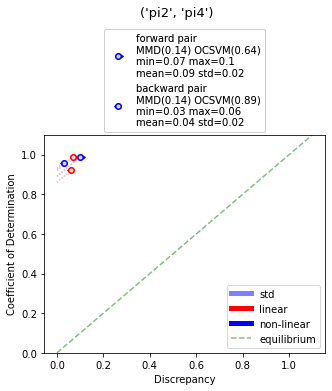

Experiment 2


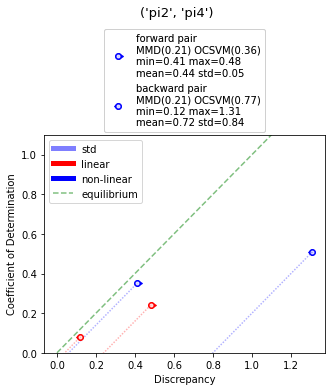

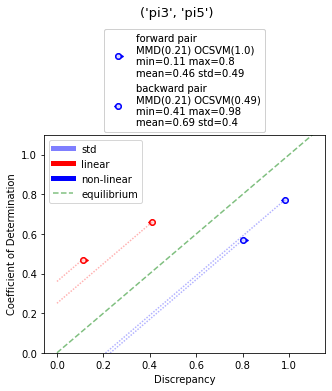

Experiment 3


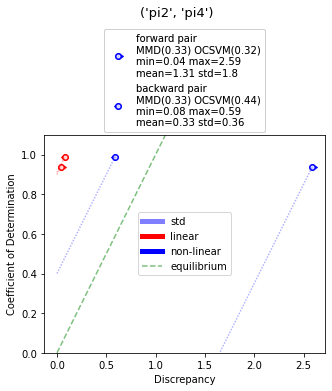

In [4]:
from visualising import plot_gnfuv_r2_discrpenacy
plot_gnfuv_r2_discrpenacy(merged_data[0])

Experiment 1


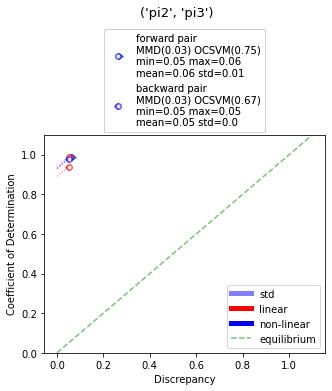

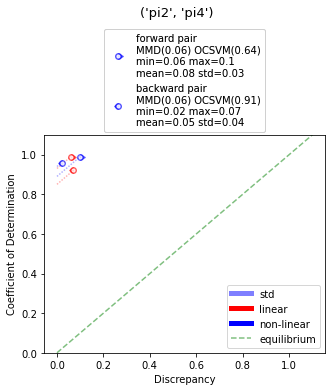

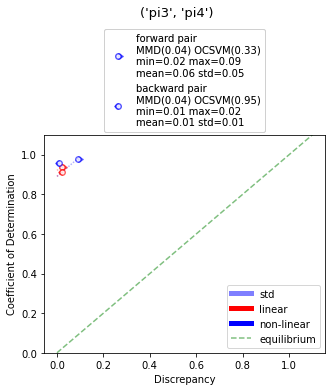

Experiment 2


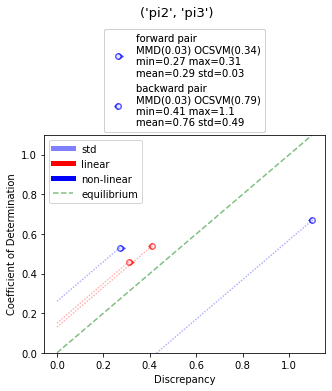

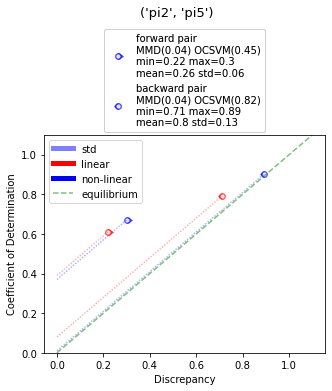

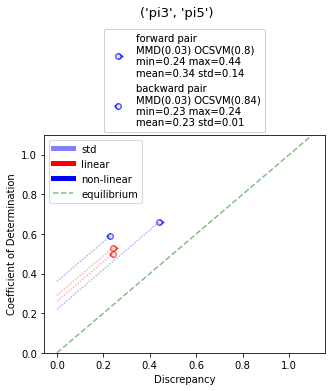

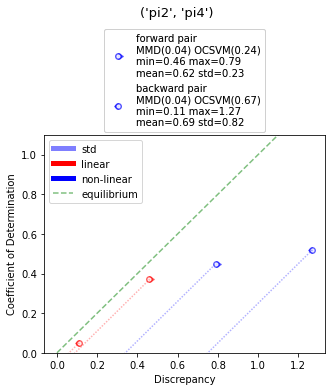

Experiment 3


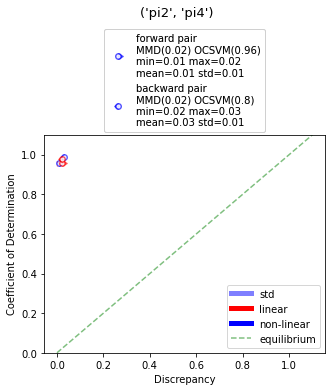

In [5]:
plot_gnfuv_r2_discrpenacy(merged_data[1])

In [13]:
from IPython.display import Image, display
results_dir = "results/GNFUV/figures/"
from pdf2image import convert_from_path
for data_type in ["_std", ""]:
    for sample_id in range(1,5):
        for experiment in range(1,4):
            pages = convert_from_path(results_dir+f"experiment_{experiment}{data_type}.pdf", 500)
            for page in pages:
                page.save(results_dir+f"experiment_{experiment}{data_type}.jpg", 'JPEG')

In [6]:
from metrics import combined_precision
print("Combined Precision \n")
combined_precision(data[0])
combined_precision(data[1])
combined_precision(data[0], per_model_type=True)
combined_precision(data[1], per_model_type=True)

Combined Precision 

original
0.6: ([1.0, 0.89, 0.38], 0.77, 0.76) (strict=True), ([1.0, 0.9, 0.98], 0.95, 0.96) (strict=False), 
0.8: ([1.0, 0.46, 0.38], 0.59, 0.61) (strict=True), ([1.0, 0.47, 0.98], 0.77, 0.82) (strict=False), 

standardised
0.6: ([0.39, 0.27, 1.0], 0.46, 0.55) (strict=True), ([0.8, 0.29, 1.0], 0.63, 0.7) (strict=False), 
0.8: ([0.39, 0.25, 1.0], 0.45, 0.55) (strict=True), ([0.8, 0.25, 1.0], 0.61, 0.68) (strict=False), 

original

kernel=rbf
0.6: ([0.99, 0.01, 0.36], 0.4, 0.45) (strict=True), ([1.0, 0.01, 0.36], 0.4, 0.46) (strict=False), 
0.8: ([0.99, 0.0, 0.34], 0.39, 0.44) (strict=True), ([1.0, 0.0, 0.34], 0.39, 0.45) (strict=False), 

kernel=linear
0.6: ([1.0, 0.9, 0.38], 0.78, 0.76) (strict=True), ([1.0, 0.9, 0.98], 0.95, 0.96) (strict=False), 
0.8: ([1.0, 0.46, 0.38], 0.59, 0.61) (strict=True), ([1.0, 0.47, 0.98], 0.77, 0.82) (strict=False), 

standardised

kernel=rbf
0.6: ([0.58, 0.19, 1.0], 0.5, 0.59) (strict=True), ([1.0, 0.25, 1.0], 0.69, 0.75) (strict=Fal

In [7]:
from metrics import ocsvm_precision
print("OCSVM Precision \n")
ocsvm_precision(data[0])
ocsvm_precision(data[1])
print()
ocsvm_precision(data[0], per_model_type=True)
ocsvm_precision(data[1], per_model_type=True)

OCSVM Precision 

original: ([1.0, 0.94, 0.38], 0.79, 0.77) (strict=True), ([1.0, 0.95, 0.98], 0.97, 0.98) (strict=False), 
standardised: ([0.39, 0.29, 1.0], 0.47, 0.56) (strict=True), ([0.8, 0.33, 1.0], 0.65, 0.71) (strict=False), 

original, kernel=rbf: ([0.99, 0.23, 1.0], 0.68, 0.74) (strict=True), ([1.0, 0.26, 1.0], 0.69, 0.75) (strict=False), 
original, kernel=linear: ([1.0, 0.96, 0.38], 0.8, 0.78) (strict=True), ([1.0, 0.96, 0.98], 0.98, 0.98) (strict=False), 
standardised, kernel=rbf: ([0.58, 0.28, 1.0], 0.54, 0.62) (strict=True), ([1.0, 0.37, 1.0], 0.74, 0.79) (strict=False), 
standardised, kernel=linear: ([0.32, 0.28, 1.0], 0.44, 0.53) (strict=True), ([0.8, 0.3, 1.0], 0.64, 0.7) (strict=False), 


In [8]:
from metrics import mmd_precision
print("MMD Precision \n")
mmd_precision(data[0])
mmd_precision(data[1])
print()
mmd_precision(data[0], per_model_type=True)
mmd_precision(data[1], per_model_type=True)

MMD Precision 

original
0.8: ([1.0, 0.47, 1.0], 0.78, 0.82)
0.85: ([1.0, 0.28, 1.0], 0.7, 0.76)
0.9: ([1.0, 0.12, 1.0], 0.63, 0.71)

standardised
0.8: ([1.0, 0.56, 1.0], 0.82, 0.85)
0.85: ([1.0, 0.51, 1.0], 0.8, 0.84)
0.9: ([1.0, 0.42, 1.0], 0.76, 0.81)


original

kernel=rbf
0.8: ([1.0, 0.0, 0.34], 0.39, 0.45)
0.85: ([1.0, 0.0, 0.27], 0.37, 0.42)
0.9: ([1.0, 0.0, 0.04], 0.3, 0.35)

kernel=linear
0.8: ([1.0, 0.48, 1.0], 0.78, 0.83)
0.85: ([1.0, 0.28, 1.0], 0.7, 0.76)
0.9: ([1.0, 0.12, 1.0], 0.63, 0.71)

standardised

kernel=rbf
0.8: ([1.0, 0.15, 1.0], 0.65, 0.72)
0.85: ([1.0, 0.1, 1.0], 0.63, 0.7)
0.9: ([1.0, 0.06, 1.0], 0.62, 0.69)

kernel=linear
0.8: ([1.0, 0.63, 1.0], 0.85, 0.88)
0.85: ([1.0, 0.56, 1.0], 0.82, 0.85)
0.9: ([1.0, 0.46, 1.0], 0.78, 0.82)



In [9]:
from metrics import gnfuv_speedup
print(std[0], ":", gnfuv_speedup(data[0])) 
print(std[1], ":", gnfuv_speedup(data[1]))

original : ([0.23, 0.3, 0.24], 0.26, 0.26)
standardised : ([0.26, 0.28, 0.23], 0.26, 0.26)


In [10]:
from results_helper_functions import gnfuv_data_summary
gnfuv_data_summary(data[0])
gnfuv_data_summary(data[0], best_entry=True)

Data sunmary for experiment 1
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 1
The number of entries per model type are rbf=0, linear=93
linear models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
The number of entries per model type are rbf=4, linear=131
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
The number of entr

In [11]:
gnfuv_data_summary(data[1])
gnfuv_data_summary(data[1], best_entry = True)

Data sunmary for experiment 1
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 1
The number of entries per model type are rbf=65, linear=109
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
The number of entries per model type are rbf=44, linear=136
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
The number of entries